## ANLY590 Assignment 1

**Problem 1.** We use LASSO regression to predict `Salary` from other numeric predictors in the *Hitters* dataset.

We'll begin by importing the necessary libraries and taking a brief look at the dataset.

In [225]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model
np.random.rand(12345)

%matplotlib inline

In [226]:
df = pd.read_csv('Hitters.csv')
df.head()

,Unnamed: 0,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,...,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,-Andy Allanson,293,66,1,30,29,14,1,293,66,...,30,29,14,A,E,446,33,20,NaN,A
1,-Alan Ashby,315,81,7,24,38,39,14,3449,835,...,321,414,375,N,W,632,43,10,475.0,N
2,-Alvin Davis,479,130,18,66,72,76,3,1624,457,...,224,266,263,A,W,880,82,14,480.0,A
3,-Andre Dawson,496,141,20,65,78,37,11,5628,1575,...,828,838,354,N,E,200,11,3,500.0,N
4,-Andres Galarraga,321,87,10,39,42,30,2,396,101,...,48,46,33,N,E,805,40,4,91.5,N


Some athletes don't have salaries listed. We'll remove those athletes from our dataframe, and we'll also omit any categorical data points.

In [227]:
print('Original dimensions:', df.shape)
print('Number of athletes without salaries recorded:', pd.isna(df['Salary']).sum())
df = df.dropna()
df = df.drop(columns=['Unnamed: 0', 'League', 'Division', 'NewLeague'])
print('Modified dimensions:', df.shape)

Original dimensions: (322, 21)
Number of athletes without salaries recorded: 59
Modified dimensions: (263, 17)


Now we'll separate the predictors from the outcome variable.

In [228]:
X = df.drop(columns=['Salary'])
print(X.columns)
y = df['Salary']
print(y.head())

Index(['AtBat', 'Hits', 'HmRun', 'Runs', 'RBI', 'Walks', 'Years', 'CAtBat',
       'CHits', 'CHmRun', 'CRuns', 'CRBI', 'CWalks', 'PutOuts', 'Assists',
       'Errors'],
      dtype='object')
1    475.0
2    480.0
3    500.0
4     91.5
5    750.0
Name: Salary, dtype: float64


We will predict `Salary` from the other variables using LASSO and Ridge regression techniques.

Recall that LASSO coefficients minimize $$\text{RSS} + \alpha\sum_{j=1}^k \left|\beta_j\right|,$$
introducing an $\ell_1$ penalty,

and Ridge regression coefficients are estimated by minimizing $$\text{RSS} + \alpha\sum_{j=1}^k\beta_j^2,$$
introducing an $\ell_2$ penalty.

The helper function `visualize_coefficients` displays coefficient trajectories.

In [237]:
def visualize_coefficients(model):
    """ Generates a plot of numeric coefficients vs. hyperparameter setting. """
    coefficients = []
    for x in ALPHAS:
        m = model(alpha=x)
        m.fit(X, y)
        coefficients.append(m.coef_)

    # Display on a log-scale for ease of viewing
    plt.plot(np.log(ALPHAS), coefficients)
    plt.figlegend(X.columns)
    plt.xlabel(r'$\log(\alpha)$')
    plt.ylabel('Coefficients')
    plt.title(model.__name__)
    plt.show()

We'll also suppress warnings for the sake of clean output.

In [238]:
import warnings
warnings.filterwarnings('ignore')

We use LASSO to predict `Salary` as a function of the numeric predictors in the dataset.

LASSO regression
The number of predictors remaining after using cross-validation to find the optimal regularization penalty with LASSO regression is 12.
The optimal value of the regularization penalty is 0.23925480327338278.
Accuracy with LASSO is 0.5084512570922232.



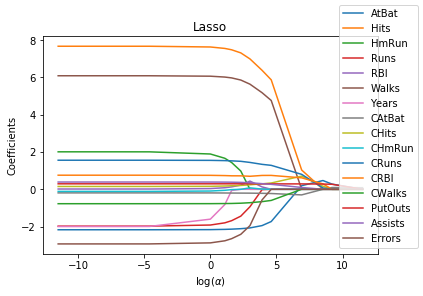

The number of predictors remaining in this LASSO regression model is 3:
[(1, 0.32947458556868287), (10, 0.07632196852894105), (11, 0.20447491636853862)]
The final 3 predictors in the model are, Hits, CRuns, CRBI.


In [262]:
# Predictors are standardized to be all on the same scale
lasso = linear_model.LassoCV(alphas=None, normalize=True)
lasso.fit(X, y)
print('LASSO regression')
print('The number of predictors remaining after using cross-validation'
      ' to find the optimal regularization penalty with LASSO regression is', 
      len([x for x in lasso.coef_ if x != 0]), end='.\n')
print('The optimal value of the regularization penalty is', lasso.alpha_, end='.\n')
print('Accuracy with LASSO is', lasso.score(X, y), end='.\n\n')

visualize_coefficients(linear_model.Lasso)

# Setting alphas=[10], there are just three predictors remaining in the model:
lasso_3_predictors = linear_model.LassoCV(alphas=[10], normalize=True)
lasso_3_predictors.fit(X, y)
print('The number of predictors remaining in this LASSO regression model is',
      len([x for x in lasso_3_predictors.coef_ if x != 0]), end=':\n')
print([(i, coef) for (i, coef) in enumerate(lasso_3_predictors.coef_) if coef != 0])
print('The final 3 predictors in the model are',
      X.columns[1], X.columns[10], X.columns[11], sep=', ', end='.\n')

Ridge regression
The optimal value of the regularization penalty from the list above is 0.01.
Accuracy with Ridge regression is 0.5199503016551482


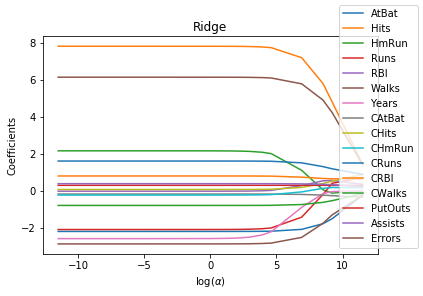

In [265]:
ALPHAS = [1e-5, 5e-5, 1e-3, 1e-2, 1, 3, 5, 10, 20, 50, 100, 1000, 5000, 10000, 100000]

# Predictors are standardized to be all on the same scale
ridge = linear_model.RidgeCV(alphas=ALPHAS, normalize=True)
ridge.fit(X, y)
print('Ridge regression')
print('The optimal value of the regularization penalty from the list above is', ridge.alpha_, end='.\n')
print('Accuracy with Ridge regression is', ridge.score(X, y))

visualize_coefficients(linear_model.Ridge)


**Problem 2.** We describe the bias-variance tradeoff, examine the role of regularization in the tradeoff, and make reference to our findings above.

Bias refers to the error introduced by representing a problem in reality with a mathematical model, one that is ostensibly a simplification. The more flexible the model is in representing the real-life situation, the lower its bias. Conversely, variance measures how a model's fit changes when exposed to different datasets. If the same model is exposed to different datasets from the same distribution, the hope is that the different resulting models are relatively similar. If this process instead yields wildly different models, then the variance is high, as the model was so flexible that it fit the noise in the various datasets. Thus, there is a tradeoff: it's really easy to select a model with high variance and low bias (a function that passes through all the training data points) as well as one with low variance and high bias (a straight line). The bias-variance tradeoff encodes a competition between flexibility and consistency: models should be flexible enough to represent complex relationships (want low bias) but not so flexible that they fit unimportant behaviors when training (want low variance).

LASSO and ridge regression allow us to use the numeric predictors in the dataset while shrinking the coefficients of the model. LASSO regression shrinks coefficients towards zero and if $\alpha$ is large enough, the coefficients become exactly zero. Ridge regression shrinks coefficients towards zero, but none of the coefficients ever vanish, so all the numeric predictors are retained.

With respect to our findings in Problem 1, the plots demonstrate that the regression coefficients shrink towards zero as $\alpha$ increases. When $\alpha$ is small (left-hand side of the plots), the regularized coefficients in either model are roughly just least squares estimates, since regularization isn't playing much of a role. When $\alpha$ is really big (right-hand side of the plots), regularization is having a prominent effect as the coefficients of the model approach zero (or become zero in the case of LASSO). This means that the models become less flexible as fewer and fewer features play a role in predicting the output. So, as $\alpha$ increases, variance decreases and bias increases.